# .h5 dataset examination

## Why?

To figure out what's inside and in which format.

In [1]:
# Show what's in the directory we are in
!ls -lh ../data/images
!ls -lh ../data/images/raw
!ls -lh ../data/images/depths 
!ls -lh ../data/images/segs 
!ls -lh ../data/images/labels 

total 0
drwxr-xr-x  3 NickBook  staff    96B Nov  4 20:58 depths
drwxr-xr-x  4 NickBook  staff   128B Nov  4 21:46 labels
drwxr-xr-x  5 NickBook  staff   160B Nov  4 20:48 raw
drwxr-xr-x  3 NickBook  staff    96B Nov  4 20:58 segs
total 1136
-rw-r--r--@ 1 NickBook  staff   207K Nov  4 20:48 brick_wall.jpg
-rw-r--r--@ 1 NickBook  staff   147K Oct 31 20:54 curved_paper.jpg
-rw-r--r--  1 NickBook  staff   210K Nov  3 02:46 garold.jpg
total 4624
-rw-r--r--  1 NickBook  staff   2.3M Nov  4 20:58 depths.h5
total 5152
-rw-r--r--  1 NickBook  staff   2.5M Nov  4 20:58 segs.h5
total 4144
-rw-r--r--  1 NickBook  staff   2.0M Nov  5 01:16 labels.h5
-rw-r--r--  1 NickBook  staff   6.0K Nov  4 21:46 labels.png


In [2]:
import os
import os.path as osp
import h5py
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Print dataset as a tree
def print_attrs(name, obj):
    print(name)
    for key, val in obj.attrs.items():
        print ("    %s: %s" % (key, val))

In [24]:
def show_and_save_image(dset, imname, path):
    pixels = dset[imname][:]
    fig, ax = plt.subplots()
    ax.set_axis_off()
    fig.subplots_adjust(bottom = 0)
    fig.subplots_adjust(top = 1)
    fig.subplots_adjust(right = 1)
    fig.subplots_adjust(left = 0)
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    im = ax.imshow(pixels)

    # SAVE and show the image
    import os.path as osp
    fig.savefig(osp.join(path), bbox_inches='tight', pad_inches=0)
    plt.show()  
    return im

## Open dataset and see, what's inside

In [67]:
db_path = osp.abspath('../results/SynthText.h5')
db = h5py.File(db_path,'r')

In [68]:
db.visititems(print_attrs)

data
data/curved_paper.jpg_0
    charBB: [[[234.82491942 253.08407865 263.5947596  272.217221   292.19875136
    90.82156127 103.88601193 112.90879429  81.11683702  91.96193416
   101.49528334 110.85308566 120.04014565 248.45142391 260.84200715
   272.73035826 279.97088299  97.06966912 109.45385423 123.19687944
   133.9599316   77.07523757  85.70996171  90.60115595  98.69047827
   107.49249553 114.50895888 196.48846985 209.62137053 226.46423874
   239.28672644 248.93452424 271.7962399   63.83605749  75.18851162
    83.94895067 261.38576525 268.26209288 276.01847174 281.20149915
   296.80900087 300.39636038 305.72420755 312.7007309  323.01788933]
  [248.29527125 264.96376898 272.09115977 284.14762309 299.94454369
   102.93738614 113.80224877 123.52641375  91.82402547 101.49528334
   110.85308566 120.04014565 129.06109412 265.68054278 269.4651136
   282.26932997 291.25537382 108.48713546 120.70977903 133.9599316
   147.09056584  84.61989756  91.24575107  97.78095148 105.74165363
   113.5

## Check the segmentation dataset segs.h5

Dataset attributes:
names
ucms
ucms/brick_wall.jpg
ucms/curved_paper.jpg
ucms/garold.jpg

Names: curved_paper.jpg, garold.jpg, brick_wall.jpg
Image: brick_wall.jpg


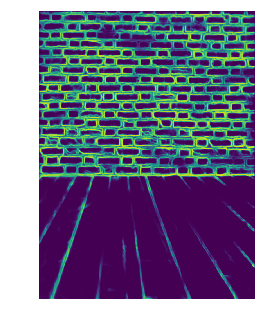

In [10]:
segs_db = h5py.File('../data/images/segs/segs.h5', 'r')
print('Dataset attributes:')
segs_db.visititems(print_attrs)
print('\nNames:', ', '.join([n[0].decode() for n in list(segs_db['names'])]))

# Check the segmentation image
IMAGE = 2
print('Image:', segs_db['names'][IMAGE][0].decode())
pixels = segs_db['ucms'][segs_db['names'][IMAGE, 0]][:] 
fig, ax = plt.subplots()
ax.set_axis_off()
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
im = ax.imshow(pixels)

# SAVE and show the image
# fig.savefig('out_segmented.png', bbox_inches='tight', pad_inches=0)
plt.show()
segs_db.close()

## Check labeled dataset labels.h5

We have passed the dataset `segs.h5` prepared before as an output of `pytorch-hed/run.py` file. Now we want to get labels and areas (and segments) using `SynthText3/prep_scripts/floodFill.py` script. The script takes the dataset described above as input and returns labeled dataset `labels.h5` as output. Let's see, what we have got at the end:

In [9]:
segs_db.close()

Dataset attributes:
mask
mask/brick_wall.jpg
    area: [   277     38    297     79    112    137    282     56    234      7
     87     42    231      5      2    143    151   8972  23448    836
    112    245    221     39    429     12    482     22      2    213
    358     23    184     82     29      1    292    224    132     11
     37     28     29      6    142     15     73     12 116356    835
     14     37    429     46    254     82     17    406    223    289
     40    285    218    212    135      2    214     58      9    209
     84    162    142    116    233     20     38    172     71    128
    169    314    261    145    221     23    203     78    159     31
     54    208     13     28     42    141    153     63    599      3
     28    410    177    522      3      1    325      2    246    282
    189     72    104    180    141     57      4      8     43    258
     42     55     65     27      1      1    619     37    264    371
    616     23    234 

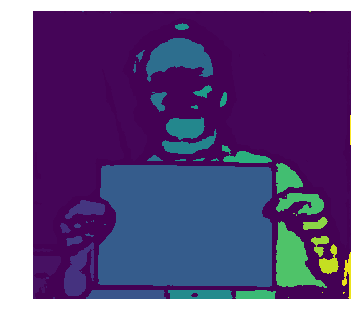

In [22]:
labels_db = h5py.File('../data/images/labels/labels.h5', 'r')
print('Dataset attributes:')
labels_db.visititems(print_attrs)

# Check the segmentation image
IMAGE = 'garold.jpg'
pixels = labels_db['mask'][IMAGE][:] 
fig, ax = plt.subplots()
ax.set_axis_off()
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
im = ax.imshow(pixels)

# SAVE and show the image
# fig.savefig('out_segmented.png', bbox_inches='tight', pad_inches=0)
plt.show()
labels_db.close()

# SynthText.h5 resulting dataset examination

In [31]:
synth_dset = h5py.File('../results/SynthText.h5', 'r')
synth_dset.visititems(print_attrs)

data
data/curved_paper.jpg_0
    charBB: [[[ 89.72069703  89.90809157  91.76463293 109.3545451  108.66243089
   224.77822549 229.56148771 232.66461219 235.45562524 244.51117682
   250.44211647 253.82530415 268.26564406 272.89409331 273.56163034
   288.12375923 292.39867725 296.65895442 306.04503591 308.3039738
   316.02141762 318.50739753 324.02995165 330.01142868 220.42630619
   224.470101   238.63485773 258.15563883 265.72695065 267.5288553
   271.9122139 ]
  [ 89.08787949  89.18635227  90.99072236 109.06999427 108.23471376
   230.69216714 231.52563885 238.58534426 241.35481868 250.44211647
   256.37816982 259.08279958 272.89409331 277.52565119 278.83420732
   294.09235341 298.35887358 301.9492087  310.69888962 314.2779086
   321.34804407 323.15080255 329.34656487 333.33670558 226.66435509
   232.56204414 246.8142529  265.72695065 273.93860152 271.9122139
   276.29836072]
  [102.82545745 102.36928343 101.8947589  121.48245712 121.26433713
   236.96090788 235.41979009 244.92594979 250

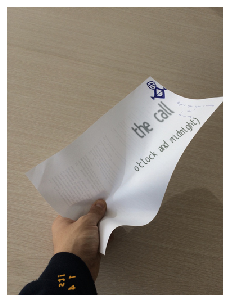

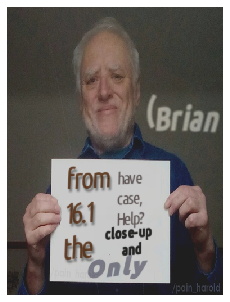

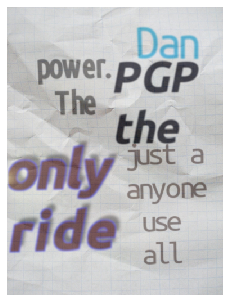

In [32]:
for im in synth_dset['data'].keys():
    show_and_save_image(synth_dset, f'data/{im}', f'../results/{im[:-2]}')

In [33]:
synth_dset.close()

In [34]:
!open ../results